# Preprocessing

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [9]:
df = pd.read_csv("avocado.csv")
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [ ]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30021 entries, 0 to 30020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30021 non-null  object 
 1   average_price  30021 non-null  float64
 2   total_volume   30021 non-null  float64
 3   4046           30021 non-null  float64
 4   4225           30021 non-null  float64
 5   4770           30021 non-null  float64
 6   total_bags     30021 non-null  float64
 7   small_bags     30021 non-null  float64
 8   large_bags     30021 non-null  float64
 9   xlarge_bags    30021 non-null  float64
 10  type           30021 non-null  object 
 11  year           30021 non-null  int64  
 12  geography      30021 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.0+ MB


(None, (30021, 13))

In [ ]:
df.isnull().sum()

,0
date,0
average_price,0
total_volume,0
4046,0
4225,0
4770,0
total_bags,0
small_bags,0
large_bags,0
xlarge_bags,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df.sort_values('date', inplace=True)

In [12]:
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week
df['dayofweek'] = df['date'].dt.dayofweek
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month,week,dayofweek
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,1,1,6
78,2015-01-04,1.13,109215.00,48285.15,37562.78,34.10,23332.97,21582.97,1750.00,0.0,conventional,2015,Roanoke,1,1,6
77,2015-01-04,1.54,4212.16,238.48,1678.83,372.55,1922.30,1570.28,352.02,0.0,organic,2015,Richmond/Norfolk,1,1,6
76,2015-01-04,1.13,182697.97,56293.75,80396.09,9762.41,36245.72,31778.36,4467.36,0.0,conventional,2015,Richmond/Norfolk,1,1,6
75,2015-01-04,2.01,3397.00,58.22,1493.90,772.21,1072.67,993.94,78.73,0.0,organic,2015,Raleigh/Greensboro,1,1,6


## EDA

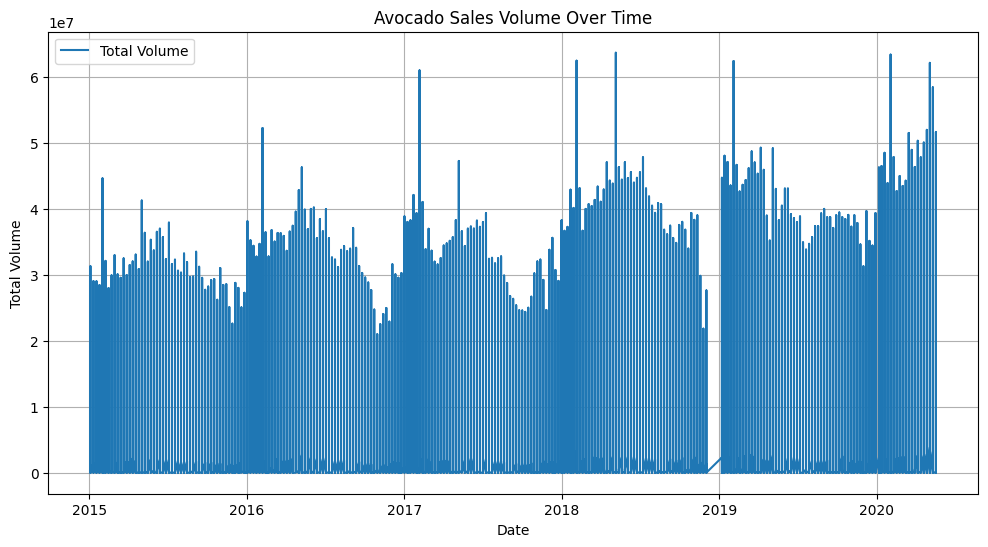

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['total_volume'], label='Total Volume')
plt.title('Avocado Sales Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.legend()
plt.grid(True)

In [13]:
import plotly.express as px

df['date'] = pd.to_datetime(df['date'])
df_plu = df[['date', '4046', '4225', '4770']].set_index('date').resample('M').sum()
fig = px.line(df_plu, x=df_plu.index, y=['4046', '4225', '4770'],
              title='Volume Sold by PLU Code',
              labels={'date': 'Date', 'value': 'Volume Sold'},
              markers=True)

fig.show()


something is not right in late 2018

<Axes: xlabel='month'>

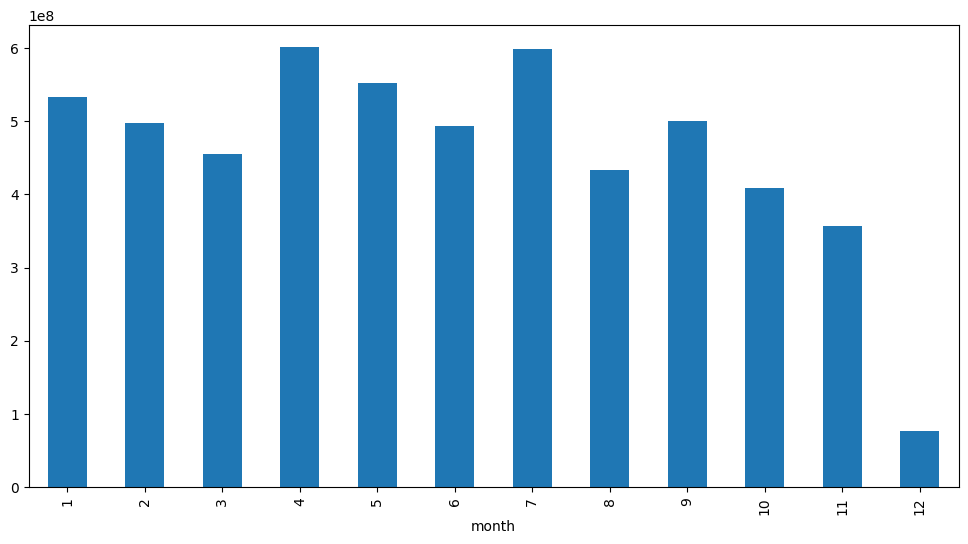

In [ ]:
df[df['year'] == 2018].groupby('month')['total_volume'].sum().plot(kind='bar', figsize=(12,6))

<Axes: title={'center': 'Row Count per Month'}, xlabel='date'>

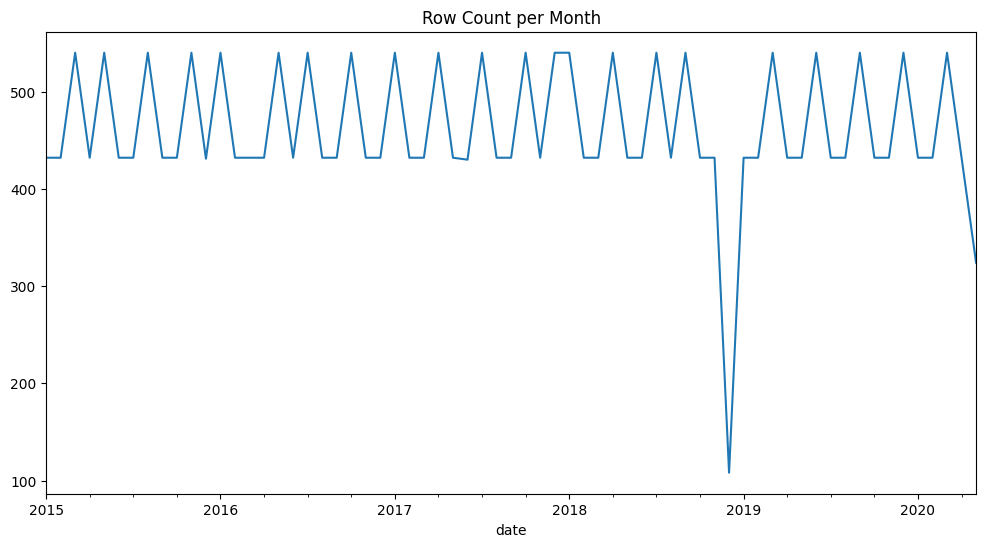

In [ ]:
monthly_counts = df.groupby(df['date'].dt.to_period('M')).size()
monthly_counts.plot(figsize=(12,6), title="Row Count per Month")

In [14]:
df_11 = df[(df['year'] == 2018) & (df['month'] == 11)]
df_12 = df[(df['year'] == 2018) & (df['month'] == 12)]

print(df_11['date'].value_counts().sort_index())
print(df_12['date'].value_counts().sort_index())


date
2018-11-04    108
2018-11-11    108
2018-11-18    108
2018-11-25    108
Name: count, dtype: int64
date
2018-12-02    108
Name: count, dtype: int64


In [15]:
df['date'] = pd.to_datetime(df['date'])  # تأكد إنه datetime فعلاً
df_12 = df[(df['date'].dt.year == 2018) & (df['date'].dt.month == 12)]

print(df_12['date'].diff().value_counts().head(10))


date
0 days    107
Name: count, dtype: int64


In [ ]:
df[(df['year'] == 2018) & (df['month'] == 12)]

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month,week,dayofweek
22207,2018-12-02,1.34,1355681.98,612611.86,341784.02,15912.46,385373.64,324902.25,60438.23,33.16,conventional,2018,Plains,12,48,6
22208,2018-12-02,1.37,48711.81,7143.10,3473.57,93.51,38001.63,32014.95,5986.68,0.00,organic,2018,Plains,12,48,6
22209,2018-12-02,1.29,425646.28,65516.30,166744.18,20396.32,172989.48,103261.97,63404.87,6322.64,conventional,2018,Portland,12,48,6
22210,2018-12-02,1.70,35310.34,731.79,8278.84,0.00,26299.71,7329.95,18969.76,0.00,organic,2018,Portland,12,48,6
22215,2018-12-02,1.08,141324.77,35443.56,26615.53,107.24,79158.44,54989.71,24168.73,0.00,conventional,2018,Roanoke,12,48,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22169,2018-12-02,1.20,211791.46,40462.54,105998.70,163.61,65166.61,61850.36,3314.03,2.22,conventional,2018,Harrisburg/Scranton,12,48,6
22168,2018-12-02,1.36,190060.12,4104.34,26960.91,52.50,158928.66,137118.98,21809.68,0.00,organic,2018,Great Lakes,12,48,6
22167,2018-12-02,1.33,2629604.72,556927.59,680604.27,187797.62,1204275.24,941855.01,232072.81,30347.42,conventional,2018,Great Lakes,12,48,6
22166,2018-12-02,1.27,9716.38,26.89,1351.38,0.00,8338.11,8143.99,194.12,0.00,organic,2018,Grand Rapids,12,48,6


In [16]:
template_day = '2018-11-25'
template_df = df[df['date'] == template_day].copy()

In [17]:
missing_sundays = pd.date_range("2018-12-09", "2018-12-30", freq="W-SUN")

In [18]:
missing_rows = []

for new_date in missing_sundays:
    temp = template_df.copy()
    temp['date'] = new_date
    temp['month'] = new_date.month
    temp['week'] = new_date.isocalendar()[1]
    temp['dayofweek'] = new_date.weekday()
    missing_rows.append(temp)

df = pd.concat([df] + missing_rows, ignore_index=True)

In [19]:
df = df.sort_values(by=['date', 'geography']).reset_index(drop=True)

<Axes: title={'center': 'Row Count per Month'}, xlabel='date'>

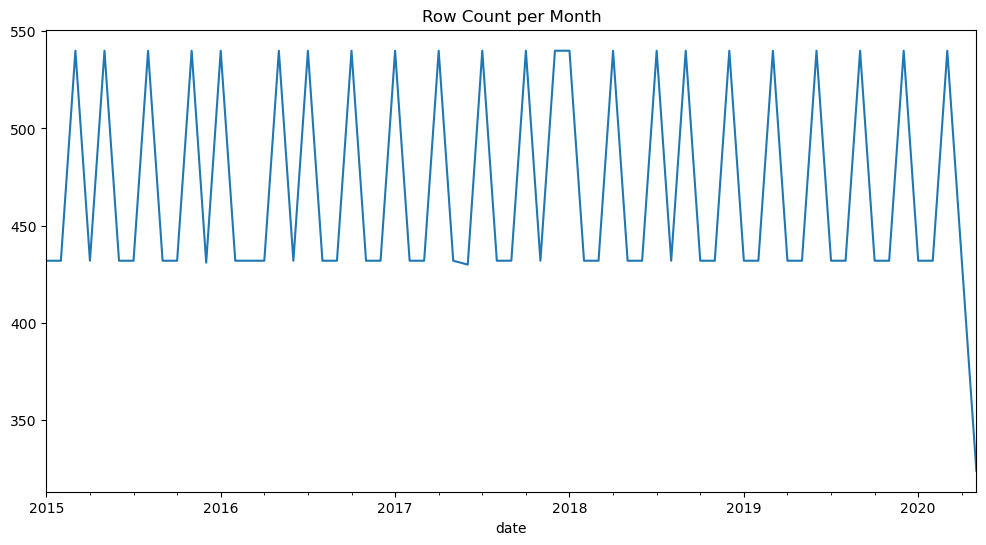

In [20]:
monthly_counts = df.groupby(df['date'].dt.to_period('M')).size()
monthly_counts.plot(figsize=(12,6), title="Row Count per Month")

In [ ]:
df[(df['year'] == 2020) & (df['month'] == 5)]

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month,week,dayofweek
30129,2020-05-03,1.59,4138.00,83.00,480.00,0.00,3574.00,1912.00,1662.00,0.00,organic,2020,Albany,5,18,6
30130,2020-05-03,1.24,167927.00,10472.86,121998.95,260.22,35194.97,18671.70,14959.93,1563.34,conventional,2020,Albany,5,18,6
30131,2020-05-03,1.50,47103.00,286.00,5817.00,0.00,40999.00,9722.00,31278.00,0.00,organic,2020,Atlanta,5,18,6
30132,2020-05-03,0.99,1132758.55,547532.02,30228.90,865.91,554131.72,509262.16,44675.55,194.01,conventional,2020,Atlanta,5,18,6
30133,2020-05-03,1.46,79874.00,417.00,5192.00,18.00,74247.00,68151.00,6096.00,0.00,organic,2020,Baltimore/Washington,5,18,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30448,2020-05-17,1.16,51690121.14,15951219.72,9221698.67,728025.52,25788840.09,16896405.58,7972084.51,920350.00,conventional,2020,Total U.S.,5,20,6
30449,2020-05-17,1.71,384158.00,23455.00,39738.00,1034.00,319932.00,130051.00,189881.00,0.00,organic,2020,West,5,20,6
30450,2020-05-17,1.09,8667913.24,2081824.04,1020965.12,33410.85,5531562.87,2580802.48,2817078.77,133681.62,conventional,2020,West,5,20,6
30451,2020-05-17,0.89,1240709.05,430203.10,126497.28,21104.42,662904.25,395909.35,265177.09,1817.81,conventional,2020,West Tex/New Mexico,5,20,6


In [21]:
df = df[~((df['year'] == 2020) & (df['month'] == 5))]

<Axes: title={'center': 'Row Count per Month'}, xlabel='date'>

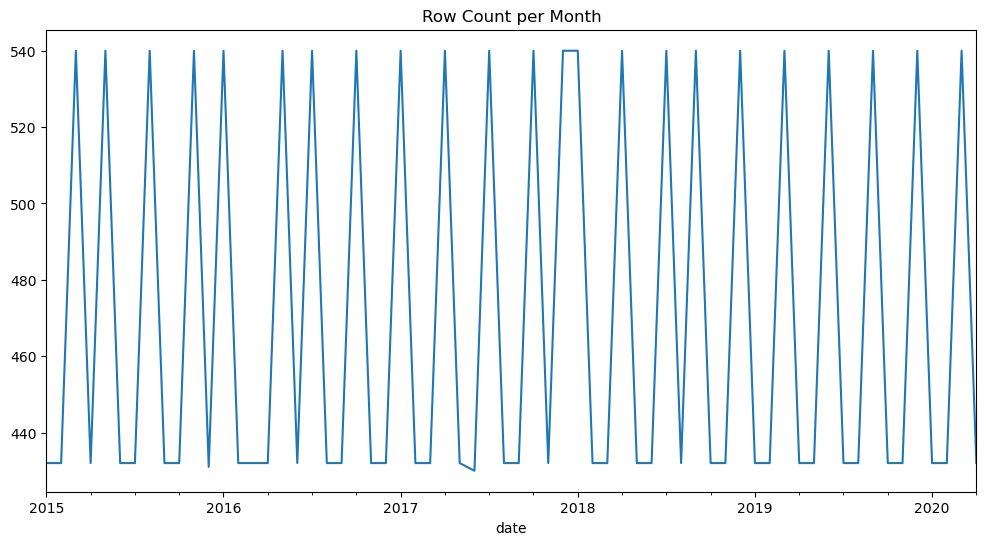

In [22]:
monthly_counts = df.groupby(df['date'].dt.to_period('M')).size()
monthly_counts.plot(figsize=(12,6), title="Row Count per Month")

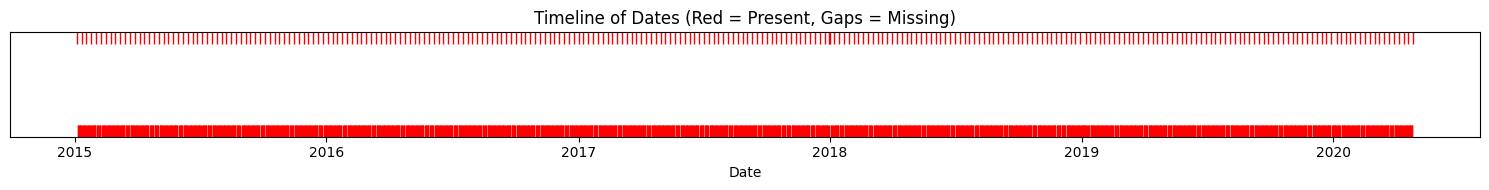

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


unique_dates = df['date'].drop_duplicates().sort_values()
full_range = pd.date_range(start=unique_dates.min(), end=unique_dates.max(), freq='D')

timeline = pd.Series(1, index=unique_dates)
timeline_full = timeline.reindex(full_range, fill_value=0)

plt.figure(figsize=(15, 2))
plt.plot(timeline_full.index, timeline_full.values, '|', markersize=10, color='red')
plt.title('Timeline of Dates (Red = Present, Gaps = Missing)')
plt.yticks([])
plt.xlabel('Date')
plt.tight_layout()
plt.show()

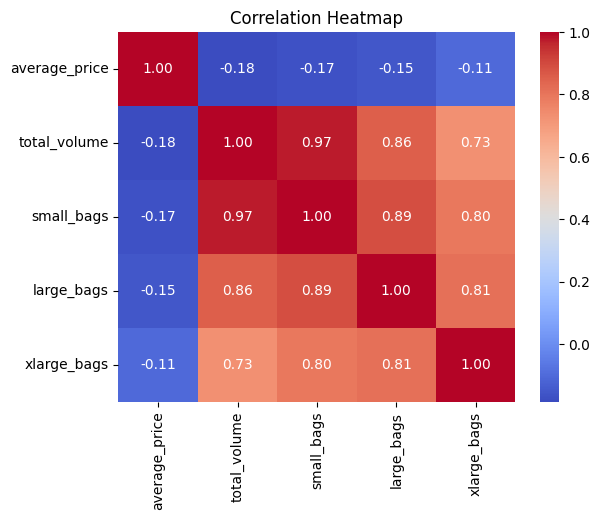

In [ ]:
import seaborn as sns
corr = df[['average_price', 'total_volume', 'small_bags', 'large_bags', 'xlarge_bags']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [23]:
import plotly.express as px

monthly = df.groupby(['year', 'month'])['total_volume'].sum().reset_index()
monthly['year_month'] = pd.to_datetime(monthly['year'].astype(str) + '-' + monthly['month'].astype(str))
fig = px.line(monthly, x='year_month', y='total_volume',
              title='Monthly Total Sales Volume',
              labels={'year_month': 'Month', 'total_volume': 'Total Volume'},
              markers=True)

fig.show()

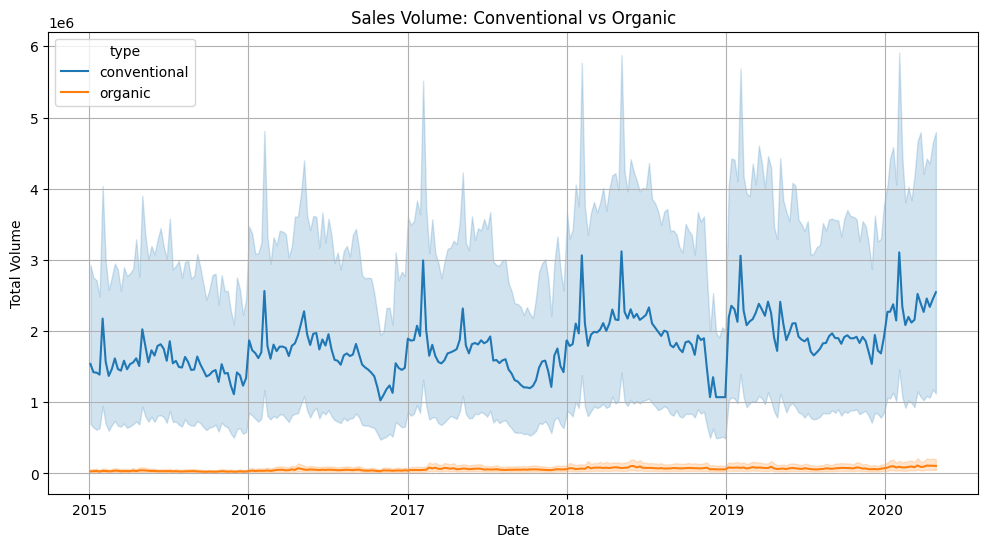

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='total_volume', hue='type')
plt.title('Sales Volume: Conventional vs Organic')
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.grid(True)
plt.show()

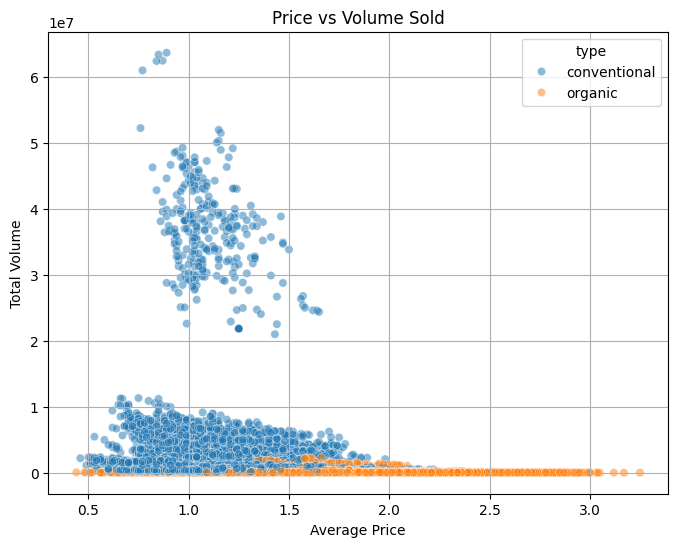

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='average_price', y='total_volume', hue='type', alpha=0.5)
plt.title('Price vs Volume Sold')
plt.xlabel('Average Price')
plt.ylabel('Total Volume')
plt.grid(True)
plt.show()

##

In [24]:
total_us = df[df['geography'] == 'Total U.S.']


In [25]:
df = df[df['geography'] != 'Total U.S.']

In [ ]:
total_us

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month,week,dayofweek
102,2015-01-04,1.46,612910.15,233286.13,216611.20,4370.99,158641.83,115068.71,43573.12,0.00,organic,2015,Total U.S.,1,1,6
103,2015-01-04,0.95,31324277.73,12357161.34,13624083.05,844093.32,4498940.02,3585321.58,894945.63,18672.81,conventional,2015,Total U.S.,1,1,6
210,2015-01-11,1.42,669528.88,270966.74,260971.60,3830.42,133760.12,106844.49,26915.63,0.00,organic,2015,Total U.S.,1,2,6
211,2015-01-11,1.01,29063542.75,11544810.53,12134773.38,866574.66,4517384.18,3783261.16,718333.87,15789.15,conventional,2015,Total U.S.,1,2,6
318,2015-01-18,1.42,713120.00,254319.58,311811.01,4020.85,142968.56,101850.23,41118.33,0.00,organic,2015,Total U.S.,1,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29908,2020-04-12,1.20,47850537.28,15337307.32,8657849.24,527482.31,23327706.76,15385868.36,7030807.23,911031.17,conventional,2020,Total U.S.,4,15,6
30015,2020-04-19,1.58,2182476.51,178159.04,180706.16,7018.65,1816592.66,1034500.25,782012.66,79.75,organic,2020,Total U.S.,4,16,6
30016,2020-04-19,1.14,50089191.60,15371297.43,8761487.94,661170.02,25295051.04,16144250.94,8128235.60,1022564.50,conventional,2020,Total U.S.,4,16,6
30123,2020-04-26,1.58,2135665.00,135549.00,200030.00,6809.00,1793277.00,1019488.00,773782.00,6.00,organic,2020,Total U.S.,4,17,6


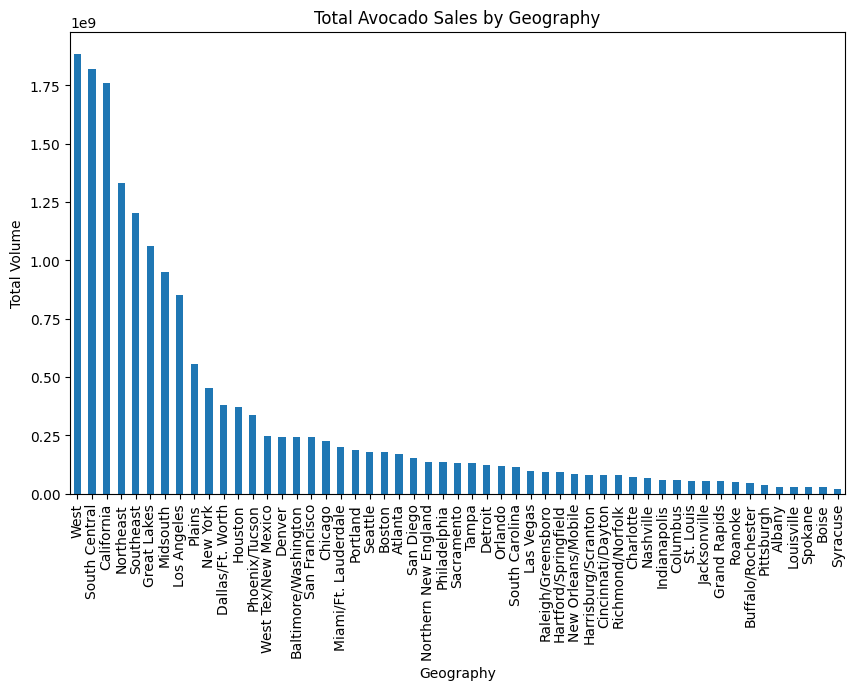

In [ ]:
geography_sales = df.groupby('geography')['total_volume'].sum().sort_values(ascending=False)
geography_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Total Avocado Sales by Geography')
plt.xlabel('Geography')
plt.ylabel('Total Volume')
plt.show()


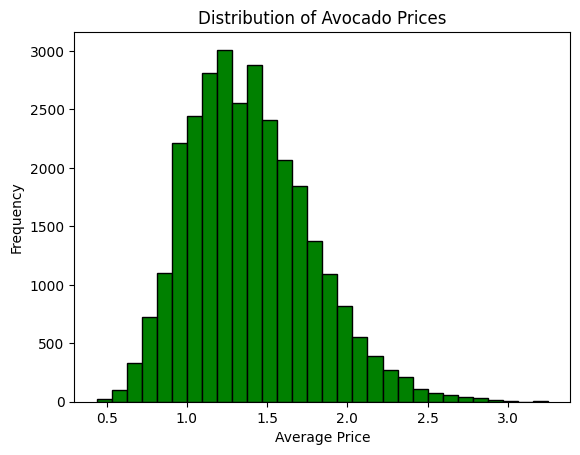

In [ ]:
plt.hist(df['average_price'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Avocado Prices')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()

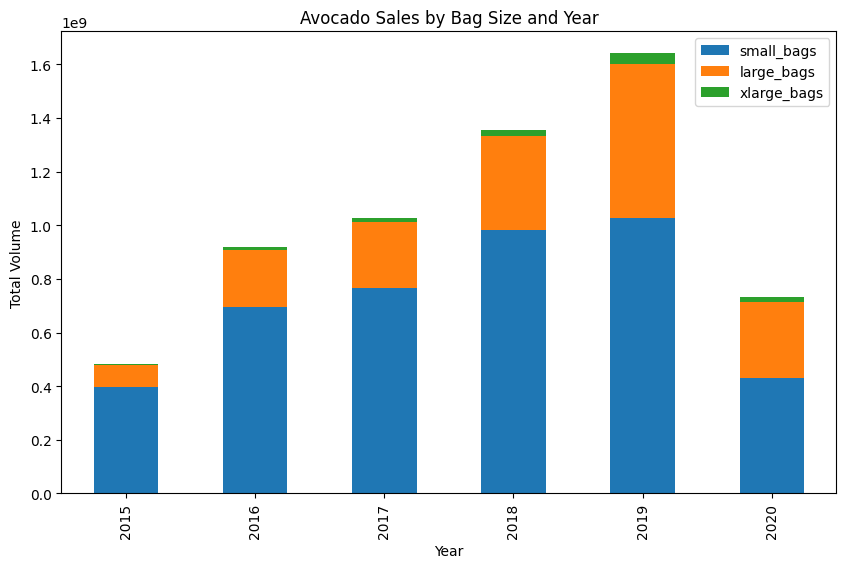

In [ ]:
bag_sales = df[['year', 'small_bags', 'large_bags', 'xlarge_bags']].groupby('year').sum()
bag_sales.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Avocado Sales by Bag Size and Year')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.show()

In [26]:
df['month'] = pd.to_datetime(df['date']).dt.month

monthly_trends = df.groupby('month').agg({'total_volume': 'sum', 'average_price': 'mean'}).reset_index()

fig = px.line(monthly_trends, x='month', y=['total_volume', 'average_price'],
              title='Monthly Trends in Avocado Sales (Seasonality)',
              labels={'month': 'Month', 'value': 'Value'},
              markers=True)

fig.update_traces(mode='lines+markers')
fig.show()

# Feature Engineering

In [27]:
df['type_encoded'] = df['type'].map({'conventional': 0, 'organic': 1})

In [28]:
df['geography_encoded'] = df.groupby('geography')['average_price'].transform('mean')

In [29]:
df.drop(columns=['geography','type'], inplace=True)

In [30]:
df['quarter'] = df['date'].dt.quarter

In [31]:
df['total_volume_lag1'] = df['total_volume'].shift(1)
df['total_volume_lag2'] = df['total_volume'].shift(2)
df['total_volume_lag3'] = df['total_volume'].shift(3)
df['total_volume_lag4'] = df['total_volume'].shift(4)

df['average_price_lag1'] = df['average_price'].shift(1)
df['average_price_lag2'] = df['average_price'].shift(2)
df['average_price_lag3'] = df['average_price'].shift(3)
df['average_price_lag4'] = df['average_price'].shift(4)

In [32]:
df.drop(df.index[:4], inplace=True)

In [ ]:
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,...,geography_encoded,quarter,total_volume_lag1,total_volume_lag2,total_volume_lag3,total_volume_lag4,average_price_lag1,average_price_lag2,average_price_lag3,average_price_lag4
4,2015-01-04,1.29,19137.28,8040.64,6557.47,657.48,3881.69,3881.69,0.00,0.0,...,1.484713,1,435021.49,3846.69,1373.95,40873.28,1.00,1.76,1.79,1.22
5,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,...,1.484713,1,19137.28,435021.49,3846.69,1373.95,1.29,1.00,1.76,1.79
6,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,...,1.443889,1,788025.06,19137.28,435021.49,3846.69,1.08,1.29,1.00,1.76
7,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,...,1.443889,1,1505.12,788025.06,19137.28,435021.49,1.64,1.08,1.29,1.00
8,2015-01-04,1.83,2192.13,8.66,939.43,0.00,1244.04,1244.04,0.00,0.0,...,1.528728,1,80034.32,1505.12,788025.06,19137.28,1.01,1.64,1.08,1.29


# Modeling

## Import packages and spliting data

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.layers import BatchNormalization, Bidirectional,LayerNormalization, Attention
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, SpatialDropout1D,TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from xgboost import XGBRegressor
from prophet import Prophet

from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA


In [38]:
df = df.set_index('date')

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['total_volume']])

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(scaled_data, seq_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, shuffle=False, test_size=0.1)
y_test_flat = y_test.reshape(-1, 1)
y_test_rescaled = scaler.inverse_transform(y_test_flat)


## Particle Swarm Optimization

In [ ]:
def run_pso_optimization(objective_func, param_grid, n_particles=10, n_iterations=10):
    w = 0.7 
    c1 = 1.5  
    c2 = 1.5 
    param_bounds = {k: (min(v), max(v)) for k, v in param_grid.items()}
    n_params = len(param_grid)

    positions = np.array([
        [random.uniform(param_bounds[k][0], param_bounds[k][1]) for k in param_grid.keys()]
        for _ in range(n_particles)
    ])

    velocities = np.random.uniform(-1, 1, (n_particles, n_params))
    personal_best_positions = positions.copy()
    personal_best_scores = np.full(n_particles, float('inf'))

    global_best_position = None
    global_best_score = float('inf')

    for iteration in tqdm(range(n_iterations), desc="PSO Optimization"):
        scores = np.array([objective_func(pos) for pos in positions])

        improved_indices = scores < personal_best_scores
        personal_best_positions[improved_indices] = positions[improved_indices]
        personal_best_scores[improved_indices] = scores[improved_indices]

        if np.min(scores) < global_best_score:
            global_best_score = np.min(scores)
            global_best_position = positions[np.argmin(scores)].copy()

        for i in range(n_particles):
            r1, r2 = random.random(), random.random()
            cognitive = c1 * r1 * (personal_best_positions[i] - positions[i])
            social = c2 * r2 * (global_best_position - positions[i])
            velocities[i] = w * velocities[i] + cognitive + social
            positions[i] += velocities[i]

            for j, param in enumerate(param_grid.keys()):
                positions[i][j] = np.clip(positions[i][j],
                                          param_bounds[param][0],
                                          param_bounds[param][1])

    return global_best_position, global_best_score


## Train Models

#### XGBoost

In [ ]:
predictions = {}

In [ ]:
def train_xgboost(X_train, y_train, X_val, y_val, X_test,
                 n_estimators=10, max_depth=6,
                 learning_rate=0.1, subsample=0.8,
                 min_child_weight=1):
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_val_flat = X_val.reshape(X_val.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)

    model = XGBRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        min_child_weight=min_child_weight,
        n_jobs=-1,
        tree_method='hist',
        enable_categorical=False,
        predictor='auto',
        eval_metric='rmse'
    )

    model.fit(
        X_train_flat, y_train,
        eval_set=[(X_val_flat, y_val)],
        verbose=0
    )

    preds = model.predict(X_test_flat)
    return scaler.inverse_transform(preds.reshape(-1, 1))

In [ ]:
try:
    best_preds_xgboost = train_xgboost(
        X_train, y_train, X_val, y_val, X_test,
        n_estimators=197,
        max_depth=7,
        learning_rate=0.1,
        subsample= 0.9136270270372899
    )

    predictions["XGBoost (PSO)"] = best_preds_xgboost
    print("--------------- XGBoost (PSO) trained Successfully ---------------")
except Exception as e:
    print(f"Error occurred with XGBoost (PSO): {e}")

--------------- XGBoost (PSO) trained Successfully ---------------


#### LSTM

In [ ]:
def train_lstm(X_train, y_train, X_val, y_val, X_test,
                     hidden_units=128, dropout_rate=0.3,
                     learning_rate=0.0005, epochs=200,
                     patience=15, batch_size=64):

    model = Sequential([
        LSTM(hidden_units, return_sequences=True,
             input_shape=(X_train.shape[1], X_train.shape[2])),
        BatchNormalization(),
        Dropout(dropout_rate),

        LSTM(hidden_units//2, return_sequences=True),
        BatchNormalization(),
        Dropout(dropout_rate),

        LSTM(hidden_units//4),
        BatchNormalization(),
        Dropout(dropout_rate),

        Dense(1)
    ])

    optimizer = Adam(learning_rate=learning_rate, clipnorm=1.0)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    callbacks = [
        EarlyStopping(monitor='val_loss', patience=patience,
                     restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                         patience=patience//2, min_lr=1e-6)
    ]

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1,
        callbacks=callbacks
    )

    preds = model.predict(X_test, batch_size=batch_size)
    return scaler.inverse_transform(preds), history

In [ ]:
try:
    best_preds_lstm, history = train_lstm(
        X_train, y_train, X_val, y_val, X_test,
        hidden_units=192,
        dropout_rate=0.25,
        learning_rate=0.0003,
        epochs=120,
        patience=20,
        batch_size=48
    )
    predictions["LSTM"] = best_preds_lstm

except Exception as e:
    print(f"Error occurred with LSTM: {e}")

Epoch 1/120
444/444 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - loss: 0.7363 - mae: 0.6557 - val_loss: 0.0204 - val_mae: 0.0958 - learning_rate: 3.0000e-04
Epoch 2/120
444/444 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.2460 - mae: 0.3810 - val_loss: 0.0183 - val_mae: 0.0911 - learning_rate: 3.0000e-04
Epoch 3/120
444/444 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.0990 - mae: 0.2415 - val_loss: 0.0156 - val_mae: 0.0739 - learning_rate: 3.0000e-04
Epoch 4/120
444/444 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.0403 - mae: 0.1518 - val_loss: 0.0171 - val_mae: 0.0716 - learning_rate: 3.0000e-04
Epoch 5/120
444/444 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0196 - mae: 0.0970 - val_loss: 0.0154 - val_mae: 0.0639 - learning_rate: 3.0000e-04
Epoch 6/120
444/444 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0133 - mae: 0.0704 - val_loss: 0.0154 - val_mae: 0.0617 - learning_rate: 3.0000e-04
Epoch 7/120
444/444 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0119 - mae: 0.0631 - val_loss: 0.0157 - val_

## Predections and Evaluation

In [ ]:
results = []

for name, preds in predictions.items():
    mse = np.mean((preds - y_test_rescaled) ** 2)
    mae = mean_absolute_error(y_test_rescaled, preds)
    r2 = r2_score(y_test_rescaled, preds)

    results.append({
        'Model': name,
        'MSE': round(mse, 4),
        'MAE': round(mae, 4),
        'R²': round(r2, 4)
    })

results_df = pd.DataFrame(results)
results_df

,Model,MSE,MAE,R²
0,XGBoost (PSO),2.215582e+11,198852.9739,0.8965
1,LSTM,1.692688e+11,169825.3600,0.9209


In [ ]:
best_model_index = results_df['R²'].idxmax()
best_model_name = results_df.loc[best_model_index, "Model"]
best_score = results_df.loc[best_model_index, "R²"]

print(f"\n✅ Best Model: {best_model_name} with R² Score = {best_score:.4f}")


✅ Best Model: LSTM with R² Score = 0.9209


#### Visualize and saving the best model

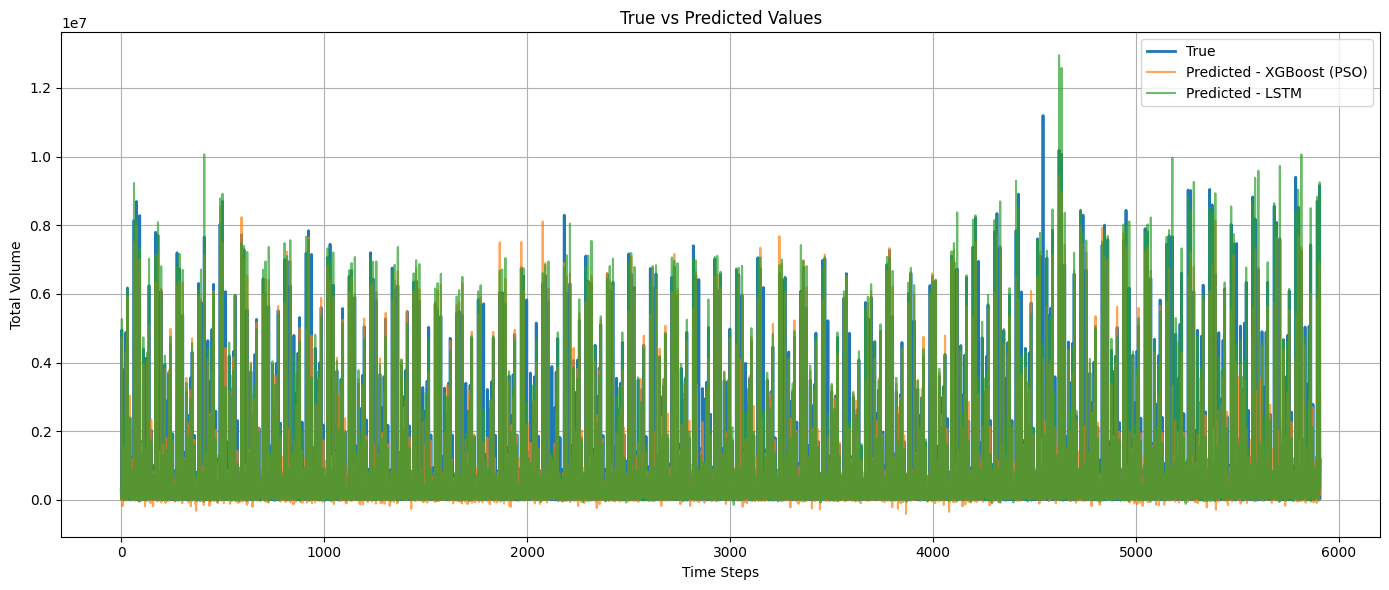

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(y_test_rescaled, label='True', linewidth=2)
for name, preds in predictions.items():
    plt.plot(preds, label=f'Predicted - {name}', alpha=0.7)
plt.title('True vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Total Volume')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


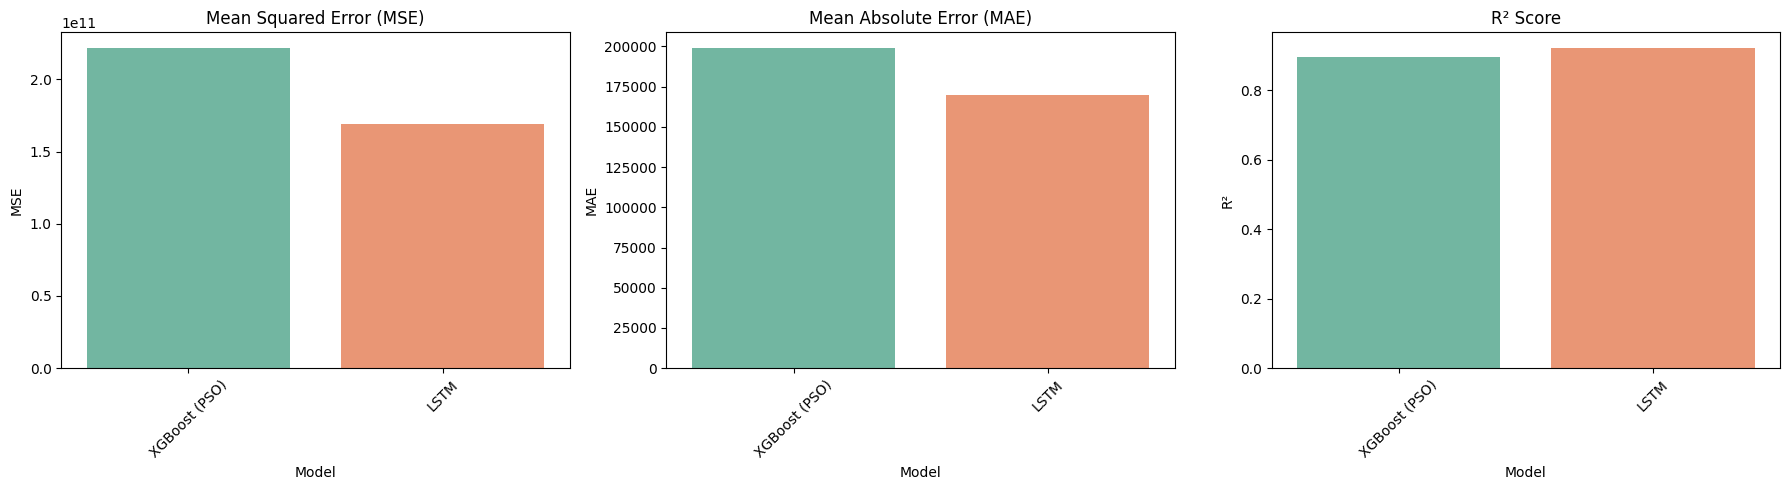

In [ ]:
plt.figure(figsize=(18, 5))

metrics = ['MSE', 'MAE', 'R²']
titles = ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'R² Score']

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.barplot(data=results_df, x='Model', y=metric, palette='Set2')
    plt.title(titles[i])
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


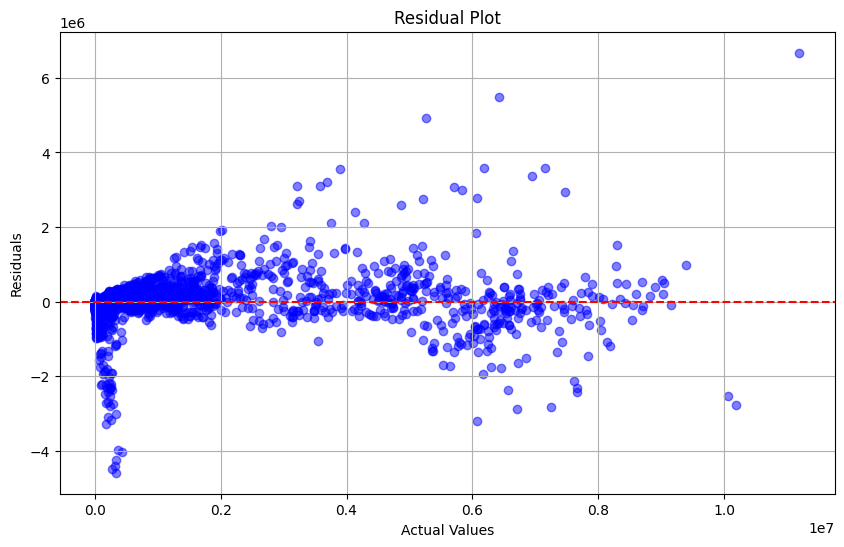

In [ ]:
import matplotlib.pyplot as plt

residuals = y_test_rescaled - predictions["LSTM"] 

plt.figure(figsize=(10,6))
plt.scatter(y_test_rescaled, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


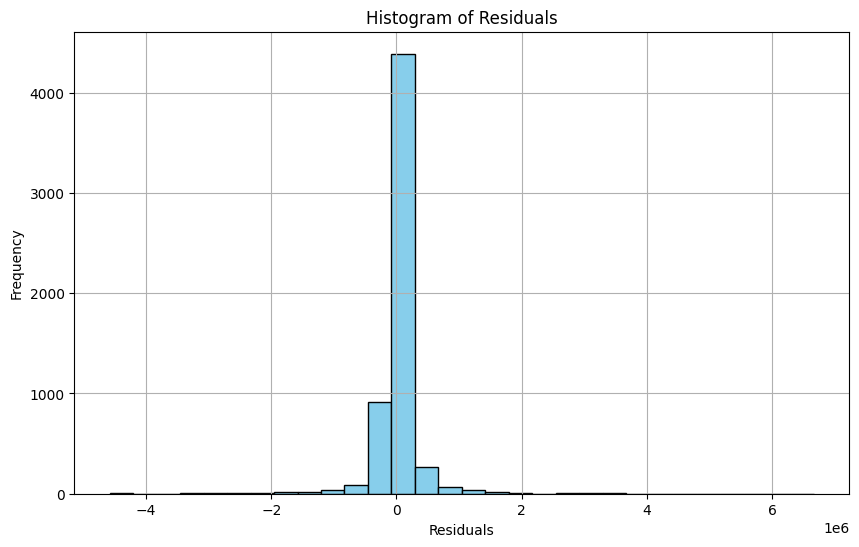

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Strengths:
- Random scatter indicates no major systematic errors 
- Centered around zero (mean residual ≈ 0)
- Majority of residuals are small

In [ ]:
final_preds = predictions[best_model_name]
mse = np.mean((final_preds - y_test_rescaled) ** 2)
mae = mean_absolute_error(y_test_rescaled, final_preds)
r2 = r2_score(y_test_rescaled, final_preds)

print(f"\n📊 Final Evaluation on Test Set ({best_model_name}):")
print(f"  MSE = {mse:.4f}")
print(f"  MAE = {mae:.4f}")
print(f"  R² = {r2:.4f}")


📊 Final Evaluation on Test Set (LSTM):
  MSE = 169268756844.3310
  MAE = 169825.3600
  R² = 0.9209


In [ ]:
import joblib

if best_model_name=="LSTM":
  history.model.save(f"{best_model_name}_model.h5")
  print(f"💾 LSTM model saved as {best_model_name}_model.h5")

joblib.dump(scaler, 'scaler.pkl')
print("✅ Scaler saved successfully.")

💾 LSTM model saved as LSTM_model.h5
✅ Scaler saved successfully.


# MLflow deployment

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.initializers import Orthogonal

model = load_model('LSTM_model.h5', compile=False, custom_objects={'Orthogonal': Orthogonal})
scaler = joblib.load("scaler.pkl")

In [4]:
import mlflow.keras
import joblib

with mlflow.start_run():
    mlflow.keras.log_model(model, "avocado_lstm_model")
    joblib.dump(scaler, "scaler.pkl")
    mlflow.log_artifact("scaler.pkl")

2025/05/15 21:25:54 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


2025/05/15 21:26:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
import mlflow

mlflow.set_tracking_uri("http://127.0.0.1:5000/")

experiment_name = "Avocado Sales Forecasting"

mlflow.set_experiment(experiment_name)

with mlflow.start_run() as run:
    mlflow.keras.log_model(model, "avocado_lstm_model")
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("R2", r2)
    run_id = run.info.run_id
    print("Run ID:", run_id)


2025/05/15 22:07:35 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


2025/05/15 22:07:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID: 898703ecf156492dbc63b256d6a91022
🏃 View run tasteful-boar-47 at: http://127.0.0.1:5000/#/experiments/656788413083921505/runs/898703ecf156492dbc63b256d6a91022
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/656788413083921505


In [ ]:
import numpy as np

def predict_price(last_30_values):
    input_array = np.array(last_30_values).reshape(-1, 1)
    scaled_input = scaler.transform(input_array)
    model_input = np.expand_dims(scaled_input, axis=0)

    scaled_prediction = model.predict(model_input)

    scaled_prediction = np.clip(scaled_prediction, 0, 1)

    predicted_value = scaler.inverse_transform(scaled_prediction)
    return float(predicted_value[0][0])



In [84]:
last_30_values = df['total_volume'][0:30].values.tolist()

In [91]:
last_30_values

[19137.28,
 788025.06,
 1505.12,
 80034.32,
 2192.13,
 491738.0,
 116253.44,
 379.82,
 142349.77,
 5777334.9,
 2965.62,
 166006.29,
 17723.17,
 783068.03,
 8764.33,
 228569.58,
 3930.94,
 158638.04,
 9895.96,
 1086363.97,
 668086.0,
 22480.07,
 369694.27,
 7446.43,
 258979.63,
 1012.61,
 61615.1,
 3382800.12,
 2896.72,
 203939.14]

In [85]:
predicted_volume = predict_price(last_30_values)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


In [ ]:
predicted_volume

23636.5703125